In [ ]:
import numpy as np
import pandas as pd



from scipy import stats
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# from sklearn.model_selection import cross_val_score
# from scipy import stats
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# from sklearn.impute import SimpleImputer
# from numpy import where
# from sklearn.datasets import make_classification
# from matplotlib import pyplot

# from numpy import unique
# from numpy import where
# from sklearn.cluster import DBSCAN
# from matplotlib import pyplot

# from scipy.fftpack import fft
# import matplotlib.pyplot as plt

# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing

# from sklearn.model_selection import GridSearchCV

# from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
# from numpy import unique

# from sklearn.decomposition import PCA

# from sklearn.feature_selection import VarianceThreshold

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# from sklearn.feature_selection import SequentialFeatureSelector

## Validação Cruzada PRIMEIRA ETAPA DO TRABALHO

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

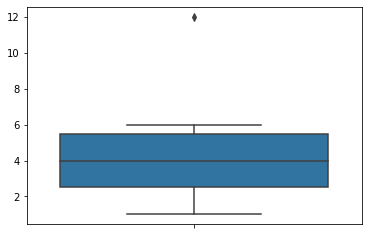

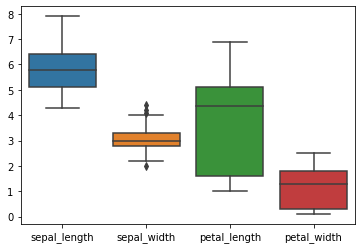

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# Apêndice A. Boxplots usando seaborn 
def example1():
    mydata=[1,2,3,4,5,6,12]
    sns.boxplot(y=mydata) # Also accepts numpy arrays
    plt.show()
def example2():
    df = sns.load_dataset('iris')
    #returns a DataFrame object. This dataset has 150 examples.
    #print(df)
    # Make boxplot for each group
    sns.boxplot( data=df.loc[:,:] )
    # loc[:,:] means all lines and all columns
    plt.show()
example1()
example2()

In [1]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score#, RepeatedStratifiedKFold
# from sklearn.model_selection import cross_val_score
# from scipy import stats
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix


# oneNN = KNeighborsClassifier(n_neighbors=1)
# scores = cross_val_score(oneNN, iris_X, iris_y, cv=10)

# print('fold accuracy:', scores)

# mean = scores.mean()
# std = scores.std()
# inf, sup = stats.norm.interval(0.95, loc=mean, 
#                                scale=std/np.sqrt(len(scores)))

# print("MÉDIA E INTERVALO DE CONFIANÇA É OQ TEM Q SER MOSTRADO NO TRABALHO:")
# print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
# print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf, sup))  
# from sklearn.model_selection import cross_val_predict

# y_pred = cross_val_predict(oneNN, iris_X, iris_y, cv=5)
# conf_mat = confusion_matrix(iris_y, y_pred)

# print(conf_mat)



# plt.matshow(conf_mat)
# for i in range(len(conf_mat)):
#     for j in range(len(conf_mat)):
#         plt.text(i, j, conf_mat[i][j], va="center", ha="center")

# plt.show()



In [2]:
import pandas as pd
df_cmap = pd.DataFrame(conf_mat, index = range(len(conf_mat)), columns = range(len(conf_mat)) )
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmap, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), annot=True) # font size
plt.tick_params(axis='both', which='major', labelsize=14, labelbottom = False, left=True, top = True, labeltop=True)
plt.show()

NameError: name 'conf_mat' is not defined

## Etapa 1
### Classificadores que não possuem hiperparâmetros

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
wine = datasets.load_wine()
wine_X, wine_y = wine.data, wine.target


cncer = datasets.load_breast_cancer()
cncer_X, cncer_y = cncer.data, cncer.target

print(wine_X)


print(np.shape(wine_X), np.unique(wine_y))
print(np.shape(cncer_X), np.unique(cncer_y))

print(type(iris))
print(type(iris_X))
print(type(iris_y))

labels = np.unique(iris_y)
print (labels)
print (iris.data.shape, iris.target.shape)

print(iris_X)
print(iris_y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13) [0 1 2]
(569, 30) [0 1]
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 1 2]
(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]


In [4]:
import warnings
import numpy as np
from scipy.stats import norm

# retorna um dict contendo media, variancia e limites inf & sup de uma lista de scores
def get_score_stts(scores):
    r = {}
    r["mean"], r["std"] = scores.mean(), scores.std()

    scale = r["std"]/np.sqrt(len(scores))
    with warnings.catch_warnings():
        if r["std"] == 0.0:
            warnings.simplefilter('ignore') #Ignora warning que são causados quando a variância = 0
        r["inf"], r["sup"] = np.nan_to_num(norm.interval(0.95, loc=r["mean"], scale=scale), nan=r["mean"])
        
    return r


In [6]:
rand_state = 36851234

## Implementação do genetic Algorithm para o Kcentroids

In [58]:
import random as rand
import numpy as np
from scipy.spatial.distance import cdist

# Utils
def evaluate_dists_state(min_dists):
    '''
        Return: SSE baseado na array de distancias
    '''
    return np.sum(min_dists)

def get_diff_obs_state(current_label, k):
    '''
        Retorna uma label diferente da label atual entre as k disponiveis
    '''
    new_label = rand.randint(0, k-1)
    while new_label == current_label:
        new_label = rand.randint(0, k-1)
    return new_label


class Clustering:
    '''Lida com a instãncia de um problema de clusterização.
    '''
    def __init__(self, data, rand_state = None):
        '''valores do problema:
                data: ndarray size M x N
                    Cada linha da array é uma observação.
                    As colunas são os atributos de cada observação
                num_obs: int
                    Número de observações no dataset
                num_feat: int
                    numero de features (atributos) no dataset
        '''
        rand.seed(rand_state)
        self.data = data
        self.num_obs = len(data)
        self.num_feat = len(data[0])

    def generate_initial_centroids(self, k):
        '''
            Seleciona aleatoriamente K linhas para serem os centroides
        '''
        points = np.random.choice(self.num_obs, size=k, replace=False)
        # print("points:", points. "\n")
        points = self.data[points].copy()
        # print("selected centroids:", points, "\n")
        return points

    def get_centroid(self):
        centroid = np.sum(self.data, axis=0)
        return (centroid / self.num_obs).tolist()

    def update_centroids(self, labels, k):
        """ Parameters:
                labels : int ndarray
                    array of the labels of the observations.
                k : int
                    The number of centroids (codes).
            Returns:
                centroids: k x n ndarray
                new centroids matrix
                has_members : ndarray
                    A boolean array indicating which clusters have members.
        """
        centroids = np.zeros((k, self.num_feat), dtype=self.data.dtype)

        # sum of the numbers of obs in each cluster
        obs_count = np.zeros(k, np.int)

        for i in range(self.num_obs):
            label = labels[i]
            obs_count[label] += 1
            centroids[label] += self.data[i]

        for i in range(k):
            cluster_size = obs_count[i]

            if cluster_size > 0:
                # Calculate the centroid of each cluster
                centroids[i] = centroids[i] / cluster_size

        # Return a boolean array indicating which clusters have members
        return centroids, obs_count > 0

    def update_centroids_safe(self, centroids, labels, k):
        """ Atualiza o estado da lista de centroides com base nas labels
            Difere da função update_centroids por corrigir internamente
            problemas de cluster sem membros
        """
        new_centroids, has_members = self.update_centroids(labels, k)
        # Caso algum centroide novo não possua membros, atribui a posicao anterior
        if not has_members.all():
            # Setting to previous centroid position
            new_centroids[~has_members] = centroids[~has_members]
        return new_centroids

    def assign_clusters(self, centroids):
        ''' Parametros:
                centroids: ndarray size k x N
                    Cada linha é um centroide
            Retornos:
                labels: ndarray size M
                    Uma array contendo o index do cluster atribuido a cada observacao
                min_dists: ndarray size M
                    Array contendo a distancia da i-ésima observação até o centroide mais proximo
        '''
        dists = cdist(self.data, centroids, 'sqeuclidean')
        labels = dists.argmin(axis=1)
        min_dists = dists[np.arange(len(labels)), labels]
        return labels, min_dists

    # GENTIC ALGORITHN
    def evaluate(self, state):
        """Retorna o sse de um centroide (state)"""
        min_dists = self.assign_clusters(state)[1]
        return evaluate_dists_state(min_dists)

    def gerar_populacao(self, populacao, t_pop, k):
        """Preenche uma população a partir do primeiro individuo da população dada
        """
        state = populacao[0]
        labels = self.assign_clusters(state)[0]

        while len(populacao) < t_pop:
            new_labels = labels.copy()
            rand_obs = rand.randrange(0, self.num_obs)

            new_labels[rand_obs] = get_diff_obs_state(labels[rand_obs], k)
            new_state, has_members = self.update_centroids(new_labels,k)

            if has_members.all():
                populacao.append(new_state)

    def selecao(self, states):
        """ função de selecao por roleta (mantendo um unico sobrevivente na população)
                1º: calcula as probabilidades de cada um sobreviver
                2º: calcula a faixa de sobrevivência
                3º: Roda a roleta
        """
        total = sum(list(map(self.evaluate, states)))
        percents = list(map(lambda s: (s, self.evaluate(s)/total),states))

        prob_ranges = list()
        low_bound = 0
        for s in percents:
            prob_ranges.append((s[0], low_bound, low_bound + s[1]))
            low_bound += s[1]

        n = rand.random()
        # n = rand.uniform(0,1)
        for prob in prob_ranges:
            if n >= prob[1] and n <= prob[2]:
                states.clear()
                states.append(prob[0])

    def mutacao(self, state):
        labels = self.assign_clusters(state)[0]
        k = len(state)

        # define aleatoriamente quantas mutacoes acontecerao nas labels (até 10)
        for _ in range(rand.randint(1,10)):
            rand_obs = rand.randrange(0, self.num_obs)
            labels[rand_obs] = get_diff_obs_state(labels[rand_obs], k)

        new_state = self.update_centroids_safe(state, labels, k)

        return new_state

    def melhor_da_geracao(self, states):
        num_pop = len(states)

        melhor = states[0].copy()
        melhor_sse = self.evaluate(states[0])

        for i in range(1, num_pop):
            sse = self.evaluate(states[i])
            if sse < melhor_sse:
                melhor = states[i].copy()
                melhor_sse = sse

        return melhor, melhor_sse

""" Metodo Algoritmo Genético
        Hiperparametros : 
            max_iter : número máximo de iterações (critério de parada)
            t_pop : tamanho da população
            taxa_cross : chance de ocorrer crossover
            taxa_mutacao : chance de ocorrer mutação

        Tipo : Baseada em Soluções Completas -> Busca Populacional -> Computação Evolutiva
"""
import time
import random as rand
import numpy as np

def ocorre(p):
    """Retorna se um evento com chance p ocorre ou não
    """
    n = rand.random()
    return  n <= p

def crossover(state1, state2):
    num_feat = len(state1)
    # Quantidade aleatoria de crossovers
    qtd = rand.randint(0, num_feat)

    for _ in range(qtd):
        gene = rand.randrange(num_feat)
        aux = state1[gene]
        state1[gene] = state2[gene]
        state2[gene] = aux


def genetic(problem: Clustering, k, t_pop, taxa_cross, taxa_mutacao, t = 1., max_sem_melhora = 20, max_iter = 3000, rand_state=None):
    """ Parametros : 
            problem : uma instancia do problema de clustering
            k : quantidade de centroides
            t_pop : tamanho da população
            taxa_cross : chance de ocorrer crossover
            taxa_mutacao : chance de ocorrer mutação
            max_sem_melhora : quantidade maxima de iteracoes sem melhora (critério de parada)
            max_iter : número máximo de iterações (critério de parada)
            t : tempo
    """
    rand.seed(rand_state)
    start = time.process_time()
    end = 0
    if k == 1:
        return [problem.get_centroid()], time.process_time()-start, 1

    melhor = problem.generate_initial_centroids(k)
    populacao = [melhor]

    melhor_sse = np.inf
    qtd_geracoes_sem_melhora = 0

    i = 0

    while i < max_iter and qtd_geracoes_sem_melhora < max_sem_melhora and end-start < t:
        # Seleciona um estado com potencial e gera a população
        problem.selecao(populacao)
        problem.gerar_populacao(populacao, t_pop, k)

        # Realiza um numero aleatorio de crossovers e mutacoes, 
        # entre metade do tamanho e o tamanho da populacao
        for _ in range(1, rand.randrange(t_pop//2,t_pop)):
            if end-start < t:
                break
            # Crossover
            if ocorre(taxa_cross):
                x = rand.randrange(len(populacao))
                y = rand.randrange(len(populacao))
                while x == y:
                    y = rand.randrange(len(populacao))
                crossover(populacao[x], populacao[y])
            # Mutacao
            if ocorre(taxa_mutacao):
                x = rand.randrange(len(populacao))
                populacao[x] = problem.mutacao(populacao[x])
                
            end = time.process_time()

        melhor_da_geracao, melhor_sse_geracao = problem.melhor_da_geracao(populacao)

        if melhor_sse_geracao < melhor_sse:
            melhor = melhor_da_geracao
            melhor_sse = melhor_sse_geracao
            qtd_geracoes_sem_melhora = 0
        else:
            qtd_geracoes_sem_melhora += 1

        i += 1
        end = time.process_time()

    return melhor, end-start, i

### KGAcentroides

In [64]:
def kga(data, k, rand_state=None):
    problem = Clustering(data, rand_state)
    centroids, _, _ =  genetic(problem, k, t_pop=10, taxa_cross=0.95, taxa_mutacao=0.2, t = 2., max_sem_melhora = 20, max_iter = 3000, rand_state=rand_state)
    return centroids

In [56]:
from sklearn.cluster import KMeans

def kmeans(data, k, rand_state=None):
    km = KMeans(n_clusters=k, random_state=rand_state)
    km.fit(data)
    return km.cluster_centers_

In [104]:
from collections import Counter
import numpy as np
from scipy.spatial.distance import cdist

from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y



class Kcentroides(BaseEstimator):
    def __init__(self, method=None, k=5, random_state=None):
        super().__init__()
        self.k = k
        self.method = method
        self.random_state = random_state
    
    def fit(self,x_train,y_train):
        x_train,y_train = check_X_y(x_train,y_train)
        clss_names = np.unique(y_train)
        mapp = { k: i for i, k in  enumerate(clss_names)}
        

        # Faz uma lista de classes, mapeando as classes em indices
        x_classes = [[] for i in range(len(clss_names))]
        for observation, clss in zip(x_train, y_train):
            x_classes[mapp[clss]].append(observation)
        
        
        # gera os k centroids de cada classe
        c_classes = [[] for i in range(len(clss_names))]
        for clss, x_clss in enumerate(x_classes):
            c_classes[clss] = self.method(np.array(x_clss), self.k, self.random_state)

        self.__c_classes = np.asarray(c_classes)
        self.__clss_names = clss_names

    def predict(self,x_test):
        dist_array = [ np.min(cdist(x_test, c_clss, 'sqeuclidean'),axis=1) for c_clss in self.__c_classes]
        return self.__clss_names[np.argmin(dist_array, axis=0)]

In [357]:
import pandas as pd
import itertools
import random as rand

def run_roulettes(roulettes, random_state = None):
    rand.seed(random_state)
    results = []
    for attr in roulettes:
        chosen = rand.random()
        for i, odd in enumerate(attr):
            if chosen <= odd:
                results.append(i)
                break
    return results

class OneRProbabilistico(BaseEstimator):
    def __init__(self, random_state=None):
        super().__init__()
        self.random_state = random_state

    def fit(self, x_train, y_train):
        x_train, y_train = check_X_y(x_train, y_train)

        # Contingency Table for each attribute in x
        contin_table = [pd.crosstab(attribute, y_train) for attribute in x_train.T ]
        # index and table of the best Attribute for differentiation
        self.i_best_attr = np.argmax([table.max(axis=1).sum() for table in contin_table])
        best_attr = contin_table[self.i_best_attr]
        # class distribution
        self.class_dist = best_attr.div(best_attr.sum(axis=1), axis=0)

    def predict(self, X):
        attr_values = X.T[self.i_best_attr]
        attr_chances = self.class_dist.loc[attr_values].values

        # Build Roulette list: [0.1, 0.5, 0.4] => [0.1, 0.6, 1.0]
        roulettes = attr_chances.copy()
        for attr in roulettes:
            for a, b, i in zip(attr, attr[1:], range(1,len(attr))): attr[i] = a + b
        
        # Run roulette
        predicted_results = run_roulettes(roulettes, self.random_state)

        return predicted_results

In [350]:
x, y  = datasets["Iris"].data, datasets["Iris"].target
discretizer = KBinsDiscretizer(n_bins=2*len(np.unique(y)), encode = 'ordinal', strategy = 'kmeans')

x_disc = discretizer.fit_transform(x)

contin_table = [pd.crosstab(prop, y) for prop in x_disc.T][3]

class_dist = contin_table.div(contin_table.sum(axis=1), axis=0)

print(class_dist)

clss_names = class_dist.columns

attr_values = x_disc.T[3]

attr_chances = class_dist.loc[attr_values].values

roulettes = attr_chances.copy()
for attr in roulettes:
    for a, b, i in zip(attr, attr[1:], range(1,len(attr))): attr[i] = a + b

results = []
for attr in roulettes:
    chosen = rand.random()
    for i, odd in enumerate(attr):
        if chosen <= odd:
            results.append(i)
            break
for x in zip(roulettes, results):
    print(x)

# a = np.argmax([table.max(axis=1).sum() for table in contin_table])

# print(a)

col_0    0         1         2
row_0                         
0.0    1.0  0.000000  0.000000
1.0    1.0  0.000000  0.000000
2.0    0.0  1.000000  0.000000
3.0    0.0  0.833333  0.166667
4.0    0.0  0.080000  0.920000
5.0    0.0  0.000000  1.000000
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(array([1., 1., 1.]), 0)
(a

In [374]:
import time

# from sklearn.model_selection import cross_val_predict #Para heatmap
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

def phase_one(dataset, method, needs_discretizer=False, rand_state=None):
    start = time.process_time()
    x, y = dataset.data, dataset.target

    rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rand_state)

    pipe_list = [('transformer', StandardScaler()), ('estimator', method)]
    if needs_discretizer: 
        discretizer = KBinsDiscretizer(n_bins=2*len(np.unique(y)), encode = 'ordinal', strategy = 'kmeans')
        pipe_list.insert(1, ('discretizer', discretizer))

    pipeline = Pipeline(pipe_list)

    scores = cross_val_score(pipeline, x, y, cv=rkf, scoring="accuracy")
    status = get_score_stts(scores)

    return {"scores": scores, "status": status, "time": time.process_time()-start}


In [383]:
phase_one(datasets["Iris"], OneRProbabilistico(rand_state), True, rand_state)

{'scores': array([1.        , 0.8       , 1.        , 0.86666667, 0.86666667,
        0.86666667, 1.        , 0.93333333, 0.86666667, 0.8       ,
        1.        , 0.93333333, 0.8       , 0.86666667, 0.8       ,
        1.        , 0.93333333, 0.93333333, 0.93333333, 0.93333333,
        0.93333333, 1.        , 0.86666667, 0.8       , 0.73333333,
        1.        , 0.93333333, 0.93333333, 1.        , 0.93333333]),
 'status': {'mean': 0.908888888888889,
  'std': 0.07597920443235004,
  'inf': 0.8817005793659591,
  'sup': 0.9360771984118188},
 'time': 1.4256569999997737}

In [376]:
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler

def phase_two(dataset, method, grid, rand_state=None):
    start = time.process_time()
    x, y = dataset.data, dataset.target

    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', method)])

    inner = StratifiedKFold(n_splits=4,random_state=rand_state, shuffle=True)
    inner_gs = GridSearchCV(estimator=pipeline, param_grid = grid, scoring='accuracy', cv = inner)
        
    outter = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rand_state)

    scores = cross_val_score(inner_gs, x, y, scoring='accuracy', cv = outter)
    status = get_score_stts(scores)

    return {"scores": scores, "status": status, "time": time.process_time()-start}

In [384]:
from sklearn import datasets

# Classificadores
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rand_state = 36851234

datasets = {
    'Iris': datasets.load_iris(),
    'Digits': datasets.load_digits(),
    'Wine': datasets.load_wine(),
    'Breast Cancer': datasets.load_breast_cancer()
}

classifs = {
    "call": {
        "ZeroR": DummyClassifier(strategy="most_frequent", random_state=rand_state),
        "Aleatorio": DummyClassifier(strategy="uniform", random_state=rand_state),
        "Estratificado": DummyClassifier(strategy="stratified", random_state=rand_state),
        "OneR Probab": OneRProbabilistico(random_state=rand_state), 
        "Naive Bayes": GaussianNB(),
        "KMeans": Kcentroides(method=kmeans, random_state=rand_state),
        "KGA": Kcentroides(method=kga, random_state=rand_state),
        "KNN": KNeighborsClassifier(weights='uniform'), 
        "DistKNN": KNeighborsClassifier(weights='distance'),
        "Árvore Desc": DecisionTreeClassifier(random_state=rand_state),
        "Floresta": RandomForestClassifier(random_state=rand_state)
    },
    "p_grid": {
        "KMeans": {'estimator__k': [1,3,5,7]},
        "KGA": {'estimator__k': [1,3,5,7]},
        "KNN": {'estimator__n_neighbors': [1,3,5,7]}, 
        "DistKNN": {'estimator__n_neighbors': [1,3,5,7]},
        "Árvore Desc": {'estimator__max_depth': [None, 3, 5,10]},
        "Floresta": {'estimator__n_estimators': [10,20,50,100]}
    },
    "needs_discrete": ["OneR Probab"]
}

# Initializing results dict
results = {k: dict(dict.fromkeys(classifs["call"])) for k in  datasets}

# Processando
for dataset, ds_data in datasets.items():
    for method, call in classifs["call"].items():
        if method not in classifs["p_grid"]:
            results[dataset][method] = phase_one(ds_data, call, method in classifs["needs_discrete"], rand_state)
        else:
            results[dataset][method] = phase_two(ds_data, call, classifs["p_grid"][method], rand_state)
        print(dataset, method, results[dataset][method]["status"], round(results[dataset][method]["time"], 2))

Iris ZeroR {'mean': 0.3333333333333334, 'std': 1.1102230246251565e-16, 'inf': 0.33333333333333337, 'sup': 0.3333333333333335} 0.05
Iris Aleatorio {'mean': 0.26666666666666666, 'std': 0.0, 'inf': 0.26666666666666666, 'sup': 0.26666666666666666} 0.05
Iris Estratificado {'mean': 0.4666666666666667, 'std': 0.0, 'inf': 0.4666666666666667, 'sup': 0.4666666666666667} 0.06
Iris OneR Probab {'mean': 0.908888888888889, 'std': 0.07597920443235004, 'inf': 0.8817005793659591, 'sup': 0.9360771984118188} 1.53
Iris Naive Bayes {'mean': 0.9511111111111111, 'std': 0.051448164012401, 'inf': 0.9327009603599136, 'sup': 0.9695212618623087} 0.07
Iris KMeans {'mean': 0.9533333333333334, 'std': 0.042687494916218975, 'inf': 0.9380580901505224, 'sup': 0.9686085765161443} 24.26
Iris KGA {'mean': 0.9422222222222222, 'std': 0.06378977819736588, 'inf': 0.9193957627062735, 'sup': 0.9650486817381708} 90.5
Iris KNN {'mean': 0.9422222222222222, 'std': 0.0704132423011327, 'inf': 0.9170256300691574, 'sup': 0.9674188143752

In [639]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Plota a matrix de confusão usando Heatmap do seaborn
def plot_conf_mat(conf_mat):
    df_cmap = pd.DataFrame(conf_mat, index = range(len(conf_mat)), columns = range(len(conf_mat)) )
    sns.set(font_scale=1.4) # for label size
    fig, ax = plt.subplots(figsize=(11,10)) 
    sns.heatmap(df_cmap, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), annot=True,ax=ax, fmt='d') # font size
    plt.tick_params(axis='both', which='major', labelsize=14, labelbottom = False, left=True, top = True, labeltop=True)


### Salvar tabelas de status e matrizes de confusão interessantes

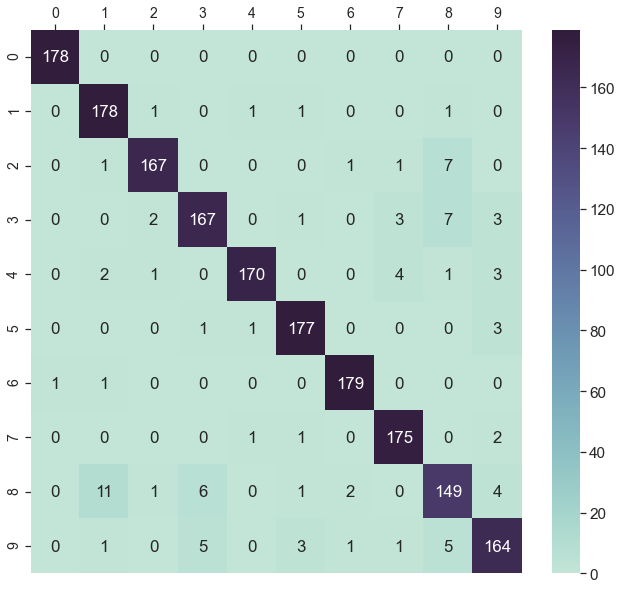

In [642]:
from pathlib import Path
import pandas as pd 
import copy

# # Salvar tabelas de status no subdiretorio /tables (latex e CSV)
# Path("tables/").mkdir(parents=True, exist_ok=True)
# for ds_name, ds_data in results.items():
#     results_df = pd.DataFrame({method: v["status"] for method, v in ds_data.items()}).T
#     display(results_df)
#     with open('tables/[LATEX]'+ ds_name.replace(" ", "_") + '_status_table.tex', 'w') as file:
#         file.write(results_df.to_latex(float_format="%.2f", label=ds_name.replace(" ", "_")+"_status_table"))
#     with open('tables/[CSV]'+ ds_name.replace(" ", "_") + '_status_table.csv', 'w') as file:
#         file.write(results_df.to_csv(float_format="%.2f"))


# , "KGA","OneR Probab"

from sklearn.metrics import confusion_matrix
# Salvar Matrizes de Confusão no diretorio /plots
for ds_name in ["Digits"]:
    x, y = datasets[ds_name].data, datasets[ds_name].target
    for m in ["KGA"]:
        skf = StratifiedKFold(n_splits=10,random_state=rand_state, shuffle=True)

        classifier = copy.deepcopy(classifs["call"][m])
        if hasattr(classifier, "k"):
            classifier.k = 5

        pipe_list = [('transformer', StandardScaler()), ('estimator', classifier)]
        if m == "OneR Probab": 
            discretizer = KBinsDiscretizer(2*len(np.unique(y)), encode='ordinal', strategy='kmeans')
            pipe_list.insert(1, ('discretizer', discretizer))
        pipeline = Pipeline(pipe_list)

        y_pred = cross_val_predict(pipeline, x, y, cv=skf)
        conf_mat = confusion_matrix(y, y_pred)

        plot_conf_mat(conf_mat)

        # # Comente as duas linhas abaixo caso não deseje salvar no computador
        Path("plots/").mkdir(parents=True, exist_ok=True)
        plt.savefig('plots/[HEATMAP]'+ m + '_' + ds_name +'_k5.png', dpi=200)
        plt.show()

In [467]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def plot_dataset_boxplot(dataset_df, dataset_name, path):
    # boxplot zscores and tempos
    figsize = (8, 5)
    _, ax = plt.subplots(figsize=figsize)
    ax.set(xlabel='Acurácia', ylabel='Classificador')

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    sns.boxplot(data=dataset_df.T, ax=ax, orient="h", palette="Set3")
    # plt.yticks(rotation=20)
    plt.tight_layout()
    
    plt.savefig(path + "[BOXPLOT]" + dataset_name + '_scores',dpi=200)
    plt.show()



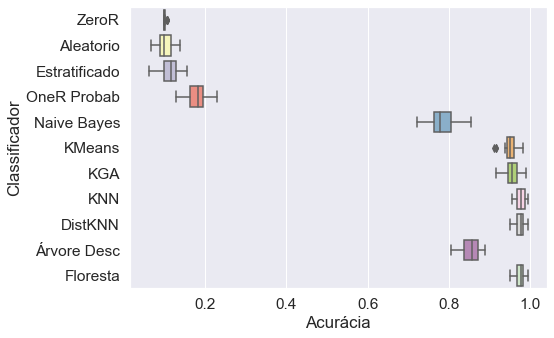

In [468]:
Path("plotss/").mkdir(parents=True, exist_ok=True)
# for ds_name, ds_data in results.items():

score_df = pd.DataFrame({method: v["scores"] for method, v in results["Digits"].items()}).T
plot_dataset_boxplot(score_df, ds_name, "plotss/")


### TABELA DE TEMPOS

In [606]:
times = {}
for ds_name, ds_data in results.items():
    times[ds_name] = {method: v["time"] for method, v in ds_data.items()}

times_df = pd.DataFrame(times)
display(times_df)

# Salvando a tabela de tempos na subpasta /tables
Path("tables/").mkdir(parents=True, exist_ok=True)
with open('tables/[LATEX]'+ "run_time_table.tex", 'w') as file:
    file.write(times_df.to_latex(float_format="%.2f", label="run_time"))
with open('tables/[CSV]'+ "run_time_table.csv", 'w') as file:
    file.write(times_df.to_csv(float_format="%.2f"))

,Iris,Digits,Wine,Breast Cancer
ZeroR,0.051909,0.085883,0.055833,0.072479
Aleatorio,0.050087,0.086948,0.059161,0.070948
Estratificado,0.056110,0.107064,0.061533,0.077211
OneR Probab,1.534407,223.995150,4.734248,19.756773
Naive Bayes,0.069807,0.186448,0.068237,0.068533
KMeans,24.259052,131.225959,25.507916,38.577018
KGA,90.498700,1207.683370,118.041690,350.431217
KNN,1.578588,18.092040,1.862164,6.143903
DistKNN,1.203269,9.360791,1.475615,3.113115
Árvore Desc,1.076799,6.206845,1.530120,3.391093


## TABELA T-TEST e WILCOXON

In [598]:
from scipy.stats import ttest_rel, wilcoxon

# Gerando tabela do teste t e wilcoxon de cada dataset
p_value_dfs = {}
for ds_name, ds_data in results.items():
    score_df = pd.DataFrame({method: v["scores"] for method, v in ds_data.items()}).T
    score_values = score_df.values
    p_value_df = np.full((len(score_values),len(score_values)), 1.)

    # Rodando ttest e wilcoxon
    for i, r1 in enumerate(score_values):
        for j, r2 in enumerate(score_values):
            if (r1==r2).all(): continue
            p_value_df[i,j] = ttest_rel(r1, r2)[1] if j > i else wilcoxon(r1, r2)[1] 

    p_value_dfs[ds_name] = pd.DataFrame(p_value_df, columns=score_df.index, index=score_df.index)
    display(ds_name, p_value_dfs[ds_name])


# Exportando tabelas como CSV e Latex
for ds_name, ds_p_value in p_value_dfs.items():
    name = ds_name.replace(" ", "_")
    column_names = [x[:5] for x in ds_p_value.columns]

    # Salvar tabela latex e CSV no subdiretorio /tables
    Path("tables/").mkdir(parents=True, exist_ok=True)

    with open('tables/[LATEX]'+ name + '_p_value_table.tex', 'w') as file:
        file.write(ds_p_value.to_latex(float_format="%.3f", index=False, header=column_names, label=name+"_p_value_table"))

    with open('tables/[CSV]'+ name + '_p_value_table.csv', 'w') as file:
        file.write(ds_p_value.to_csv(float_format="%.3f", header=column_names, index=column_names))



/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


'Iris'

,ZeroR,Aleatorio,Estratificado,OneR Probab,Naive Bayes,KMeans,KGA,KNN,DistKNN,Árvore Desc,Floresta
ZeroR,1.000000e+00,0.000000e+00,0.000000e+00,3.625163e-27,6.614062e-33,2.738657e-35,4.860192e-30,8.249202e-29,2.719388e-31,1.713313e-34,4.875186e-33
Aleatorio,4.320463e-08,1.000000e+00,0.000000e+00,1.583305e-28,3.448103e-34,1.434095e-36,2.457606e-31,4.197135e-30,1.396479e-32,8.896405e-36,2.514993e-34
Estratificado,4.320463e-08,4.320463e-08,1.000000e+00,6.401365e-24,7.182907e-30,2.946410e-32,5.718277e-27,9.505487e-26,3.072252e-28,1.885818e-31,5.454510e-30
OneR Probab,1.428061e-06,1.428061e-06,1.428061e-06,1.000000e+00,2.215122e-03,5.358247e-03,5.311588e-02,4.091007e-02,8.770799e-03,3.682943e-03,1.425827e-03
Naive Bayes,1.074534e-06,1.074534e-06,1.074534e-06,3.535644e-03,1.000000e+00,8.453803e-01,4.745695e-01,4.234951e-01,6.014763e-01,1.000000e+00,7.450142e-01
KMeans,9.911799e-07,9.911799e-07,9.911799e-07,7.914297e-03,8.684345e-01,1.000000e+00,2.017859e-01,2.826613e-01,4.479307e-01,7.867585e-01,6.014763e-01
KGA,1.132807e-06,1.132807e-06,1.132807e-06,6.224432e-02,5.078362e-01,2.059032e-01,1.000000e+00,1.000000e+00,5.725146e-01,4.029335e-01,5.574564e-01
KNN,1.155139e-06,1.155139e-06,1.155139e-06,4.387659e-02,4.754993e-01,3.049370e-01,1.000000e+00,1.000000e+00,3.255820e-01,3.800729e-01,4.146162e-01
DistKNN,1.132043e-06,1.132043e-06,1.132043e-06,1.093816e-02,5.929801e-01,4.385780e-01,4.385780e-01,2.568393e-01,1.000000e+00,6.014763e-01,7.122294e-01
Árvore Desc,1.060728e-06,1.060728e-06,1.060728e-06,4.605020e-03,1.000000e+00,7.815113e-01,4.486773e-01,4.385780e-01,5.929801e-01,1.000000e+00,7.450142e-01


'Digits'

,ZeroR,Aleatorio,Estratificado,OneR Probab,Naive Bayes,KMeans,KGA,KNN,DistKNN,Árvore Desc,Floresta
ZeroR,1.000000,0.914625,0.004093,2.766769e-17,4.230985e-41,3.380896e-51,6.718098e-52,2.320361e-56,1.878067e-57,7.959502e-46,3.290916e-56
Aleatorio,0.820129,1.000000,0.024473,3.471476e-13,1.312866e-38,2.668333e-46,1.288565e-46,9.245182e-47,3.698862e-47,7.771053e-43,1.476855e-47
Estratificado,0.008794,0.019757,1.000000,2.391892e-11,4.234274e-38,6.877142e-44,6.463958e-44,2.809039e-45,3.183051e-45,1.442504e-41,1.978643e-44
OneR Probab,0.000002,0.000002,0.000002,1.000000e+00,1.057525e-38,3.797118e-43,8.826310e-43,1.526314e-45,2.660885e-45,1.593857e-42,2.502374e-45
Naive Bayes,0.000002,0.000002,0.000002,1.722428e-06,1.000000e+00,2.329137e-23,9.517413e-25,1.728921e-24,2.148657e-25,9.637328e-12,2.115860e-25
KMeans,0.000002,0.000002,0.000002,1.724599e-06,1.722428e-06,1.000000e+00,2.481629e-01,9.542414e-10,4.111765e-10,5.047237e-20,4.425107e-09
KGA,0.000002,0.000002,0.000002,1.730037e-06,1.719176e-06,3.028409e-01,1.000000e+00,1.589949e-10,7.514677e-11,1.291787e-19,3.507833e-08
KNN,0.000002,0.000002,0.000002,1.719176e-06,1.723514e-06,3.735190e-06,3.718987e-06,1.000000e+00,4.042041e-01,1.325835e-21,7.980635e-01
DistKNN,0.000002,0.000002,0.000002,1.707294e-06,1.727860e-06,3.143795e-06,1.678421e-06,7.235078e-01,1.000000e+00,1.620758e-21,9.128560e-01
Árvore Desc,0.000002,0.000002,0.000002,1.724599e-06,3.146372e-06,1.714847e-06,1.727860e-06,1.724599e-06,1.720259e-06,1.000000e+00,5.702517e-21


/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


'Wine'

,ZeroR,Aleatorio,Estratificado,OneR Probab,Naive Bayes,KMeans,KGA,KNN,DistKNN,Árvore Desc,Floresta
ZeroR,1.000000e+00,1.335034e-08,1.950853e-24,1.154186e-17,1.142515e-29,2.950624e-29,1.131922e-30,6.097800e-29,4.334141e-29,4.972284e-27,1.713622e-35
Aleatorio,3.330222e-07,1.000000e+00,3.655820e-06,1.796824e-20,5.796583e-35,4.677767e-34,1.709105e-35,1.073429e-31,1.024542e-31,8.854698e-27,2.535193e-38
Estratificado,3.330222e-07,3.494174e-03,1.000000e+00,2.548493e-22,1.682651e-34,8.259922e-34,6.817681e-36,4.774825e-33,3.301192e-33,5.615764e-30,1.255944e-42
OneR Probab,1.603413e-06,1.607506e-06,1.606482e-06,1.000000e+00,1.500601e-17,7.320250e-17,2.594165e-17,5.379570e-17,3.113267e-17,3.184987e-13,1.202078e-18
Naive Bayes,8.056983e-07,8.056983e-07,8.022654e-07,1.630169e-06,1.000000e+00,1.577275e-01,5.050449e-01,3.169284e-03,1.672259e-03,6.181609e-08,1.611437e-01
KMeans,1.136631e-06,1.138931e-06,1.136631e-06,1.636397e-06,1.316680e-01,1.000000e+00,3.255820e-01,3.366939e-02,1.977592e-02,8.274765e-06,3.692900e-02
KGA,1.138164e-06,1.136631e-06,1.136631e-06,1.636397e-06,7.630246e-01,3.173105e-01,1.000000e+00,5.735210e-03,3.023196e-03,1.119087e-06,3.069890e-02
KNN,1.333405e-06,1.330780e-06,1.331654e-06,1.641601e-06,1.569476e-02,1.724434e-01,2.577265e-02,1.000000e+00,3.255820e-01,1.846193e-05,1.719120e-03
DistKNN,1.297045e-06,1.294480e-06,1.295334e-06,1.638477e-06,1.028591e-02,1.232646e-01,1.696933e-02,3.173105e-01,1.000000e+00,6.000890e-05,9.760144e-04
Árvore Desc,1.563968e-06,1.563968e-06,1.557972e-06,2.481339e-06,3.247680e-05,2.553844e-04,7.545643e-05,4.230854e-04,6.821297e-04,1.000000e+00,4.863720e-08


'Breast Cancer'

,ZeroR,Aleatorio,Estratificado,OneR Probab,Naive Bayes,KMeans,KGA,KNN,DistKNN,Árvore Desc,Floresta
ZeroR,1.000000,2.897445e-14,4.279828e-10,2.986870e-23,1.354275e-31,9.508690e-32,1.993569e-32,9.411920e-34,9.411920e-34,8.463425e-29,2.926097e-33
Aleatorio,0.000002,1.000000e+00,1.049650e-03,2.642294e-21,6.029275e-26,1.352926e-26,1.255918e-26,2.103982e-26,2.103982e-26,1.694022e-24,2.210177e-27
Estratificado,0.000002,2.412918e-03,1.000000e+00,5.540899e-23,6.805177e-25,7.910905e-24,1.454166e-24,6.060442e-25,6.060442e-25,2.200120e-23,1.596583e-24
OneR Probab,0.000002,1.690135e-06,1.696553e-06,1.000000e+00,2.807257e-13,1.082063e-13,2.139962e-13,1.027053e-15,1.027053e-15,1.708818e-10,1.254976e-14
Naive Bayes,0.000002,1.718093e-06,1.699769e-06,1.702991e-06,1.000000e+00,2.627581e-03,5.146350e-03,7.231289e-07,7.231289e-07,1.298494e-01,1.344812e-05
KMeans,0.000002,1.699769e-06,1.712687e-06,1.980170e-06,6.056518e-03,1.000000e+00,2.236029e-01,3.130731e-02,3.130731e-02,1.347640e-05,2.475792e-01
KGA,0.000002,1.710528e-06,1.718093e-06,1.966627e-06,2.433286e-02,3.233505e-01,1.000000e+00,1.820285e-03,1.820285e-03,5.032033e-04,5.109094e-02
KNN,0.000002,1.699769e-06,1.710528e-06,2.366017e-06,3.226302e-05,4.562885e-02,4.750410e-03,1.000000e+00,1.000000e+00,3.043835e-08,6.275985e-02
DistKNN,0.000002,1.699769e-06,1.710528e-06,2.366017e-06,3.226302e-05,4.562885e-02,4.750410e-03,1.000000e+00,1.000000e+00,3.043835e-08,6.275985e-02
Árvore Desc,0.000002,1.701916e-06,1.698696e-06,2.792831e-06,1.643195e-01,1.711207e-04,9.914332e-04,7.554808e-06,7.554808e-06,1.000000e+00,1.745165e-07
